Enter the total number of data points: 128
Enter the frequency of the first sine wave: .0078125
Enter phase of the first sine wave (in units of pi): 0
Enter the frequency of the second sine wave: .78125
Enter phase of the second sine wave (in units of pi): 0
Elapsed time =  0.0  seconds


C:\Users\gm_gi\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


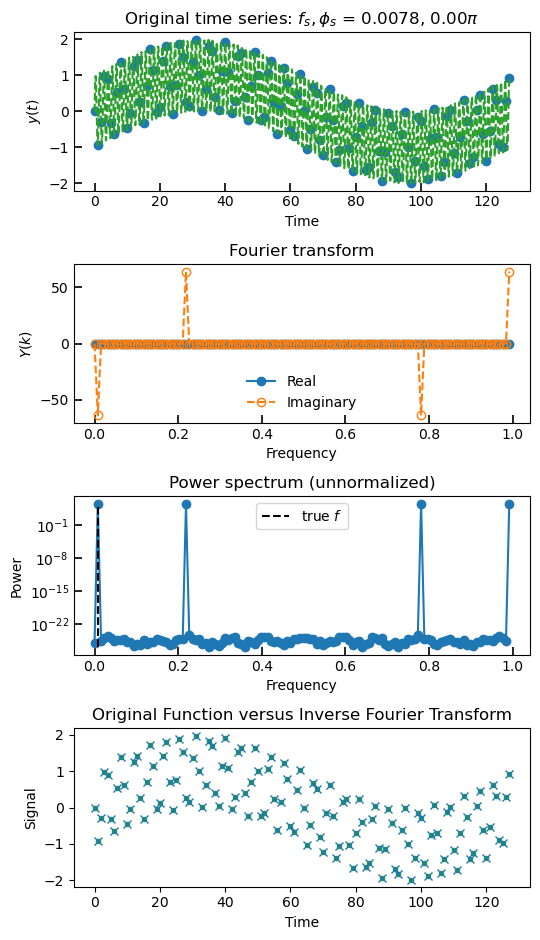

In [2]:
# ftdemo - Discrete Fourier transform demonstration program

# Set up configuration options and special features
import numpy as np
import time
import matplotlib.pyplot as plt
import datetime
import os


# Define functions to take in integer and float inputs
def dinput(input_text) :
    return int(input(input_text))


def finput(input_text) :
    return float(input(input_text))


if __name__ == '__main__':
    #* Initialize the sine wave time series to be transformed
    N = dinput('Enter the total number of data points: ')
    freq = finput('Enter the frequency of the first sine wave: ')
    phase = np.pi * finput('Enter phase of the first sine wave (in units of pi): ')
    freq2 = finput('Enter the frequency of the second sine wave: ')
    phase2 = np.pi * finput('Enter phase of the second sine wave (in units of pi): ')

    # Generate the data for the time series
    dt = 1   # Time increment
    t = np.arange(N)*dt               # t = [0, dt, 2*dt, ... ], note t = j here compared to Garcia
    y = np.sin(2*np.pi*t*freq + phase) + np.sin(2*np.pi*t*freq2 + phase2)   # Sine wave time series
    fk = np.arange(N)/(N*dt)           # f = [0, 1/(N*dt), ... ], k index


    # Lets use a finely sampled function to compare to the data, for plotting purposes:
    tmod = np.linspace(0,t[-1],1024)
    ymod = np.sin(2*np.pi*tmod*freq + phase) + np.sin(2*np.pi*tmod*freq2 + phase2)

    text_vals = r'$f_s, \phi_s$ = {0:.4f}, {1:.2f}$\pi$'.format(freq,phase/np.pi)

    #* Compute the transform using the desired method: direct summation or fast Fourier transform (FFT) algorithm.
    Y = np.zeros(N,dtype=complex)
    Method = 2

    startTime = time.time()
    if Method == 1:             # Direct summation
        twoPiN = -2 * np.pi * 1j / N    # (1j) = sqrt(-1)
        for k in range(N):
            for j in range(N):
                expTerm = np.exp(twoPiN*j*k)
                Y[k] += y[j] * expTerm
    else:                        # Fast Fourier transform:
        Y = np.fft.fft(y)               # numpy.fft.fft()
        Y_inv = np.fft.ifft(Y)
        
    stopTime = time.time()

    print('Elapsed time = ', stopTime - startTime, ' seconds')

    # power spectrum :
    P = np.abs(Y)**2

    plt.rcParams.update({'font.size': 10})  # set bigger default font size for plots

    fig1, ax1 = plt.subplots(nrows=4, ncols=1, figsize=(5.5, 9.5))
    #* Graph the time series and its transform
    # Top subplot: time axis
    ax1[0].plot(t,y,'o', label='Input data')
    ax1[0].plot(tmod,ymod,'--',c='C2', label='Sin function')
    ax1[0].set_title('Original time series: ' + text_vals,fontsize=12)
    ax1[0].set_xlabel('Time')
    ax1[0].set_ylabel('$y(t)$')
    # ax1[0].legend(frameon=True)
    ax1[0].tick_params('both', length=6, width = 1.2, which='major', direction='in')

    # Middle subplot: fourier transform
    ax1[1].plot(fk, np.real(Y),'-o', label='Real')
    ax1[1].plot(fk, np.imag(Y),'--o',mfc='None', label='Imaginary')
    ax1[1].legend(frameon=False)
    ax1[1].set_title('Fourier transform',fontsize=12)
    ax1[1].set_xlabel('Frequency')
    ax1[1].set_ylabel('$Y(k)$')
    ax1[1].tick_params('both', length=6, width = 1.2, which='major', direction='in')

    # Bottom subplot: Power Spectrum
    ax1[2].semilogy(fk, P,'-o')
    ax1[2].plot([freq,freq],[min(P),max(P)],'--',c='k',label='true $f$')
    ax1[2].set_title('Power spectrum (unnormalized)', fontsize=12)
    ax1[2].set_xlabel('Frequency')
    ax1[2].set_ylabel('Power')
    ax1[2].legend(loc='best')
    ax1[2].tick_params('both', length=6, width = 1.2, which='major', direction='in')
    #savefig('ftdemo_fig2.png')
    
    ax1[3].plot(t,y,'.',c='C2', label='Original Function')
    ax1[3].plot(t,Y_inv,'x', label='Inverse Transform')
    ax1[3].set_title('Original Function versus Inverse Fourier Transform', fontsize=12)
    ax1[3].set_xlabel('Time')
    ax1[3].set_ylabel('Signal')

    

    plt.tight_layout()

    save = False # Set this flag to true if you want to save the plots.
    if save:
        today = str(datetime.date.today())
        fig_directory = os.path.expanduser('~/figs_out/' + today)
        try:
            os.makedirs(fig_directory)
        except FileExistsError:
            pass

        timeindex = time.strftime("%H%M%S")
        fig1.savefig(fig_directory + '/240-ft-examples' + '-' + str(timeindex) + '.pdf', transparent=False)

    plt.show()


Enter the total number of data points: 512
Enter the frequency of the first sine wave: .0078125
Enter phase of the first sine wave (in units of pi): 0
Enter the frequency of the second sine wave: .78125
Enter phase of the second sine wave (in units of pi): 0
Elapsed time =  0.0  seconds


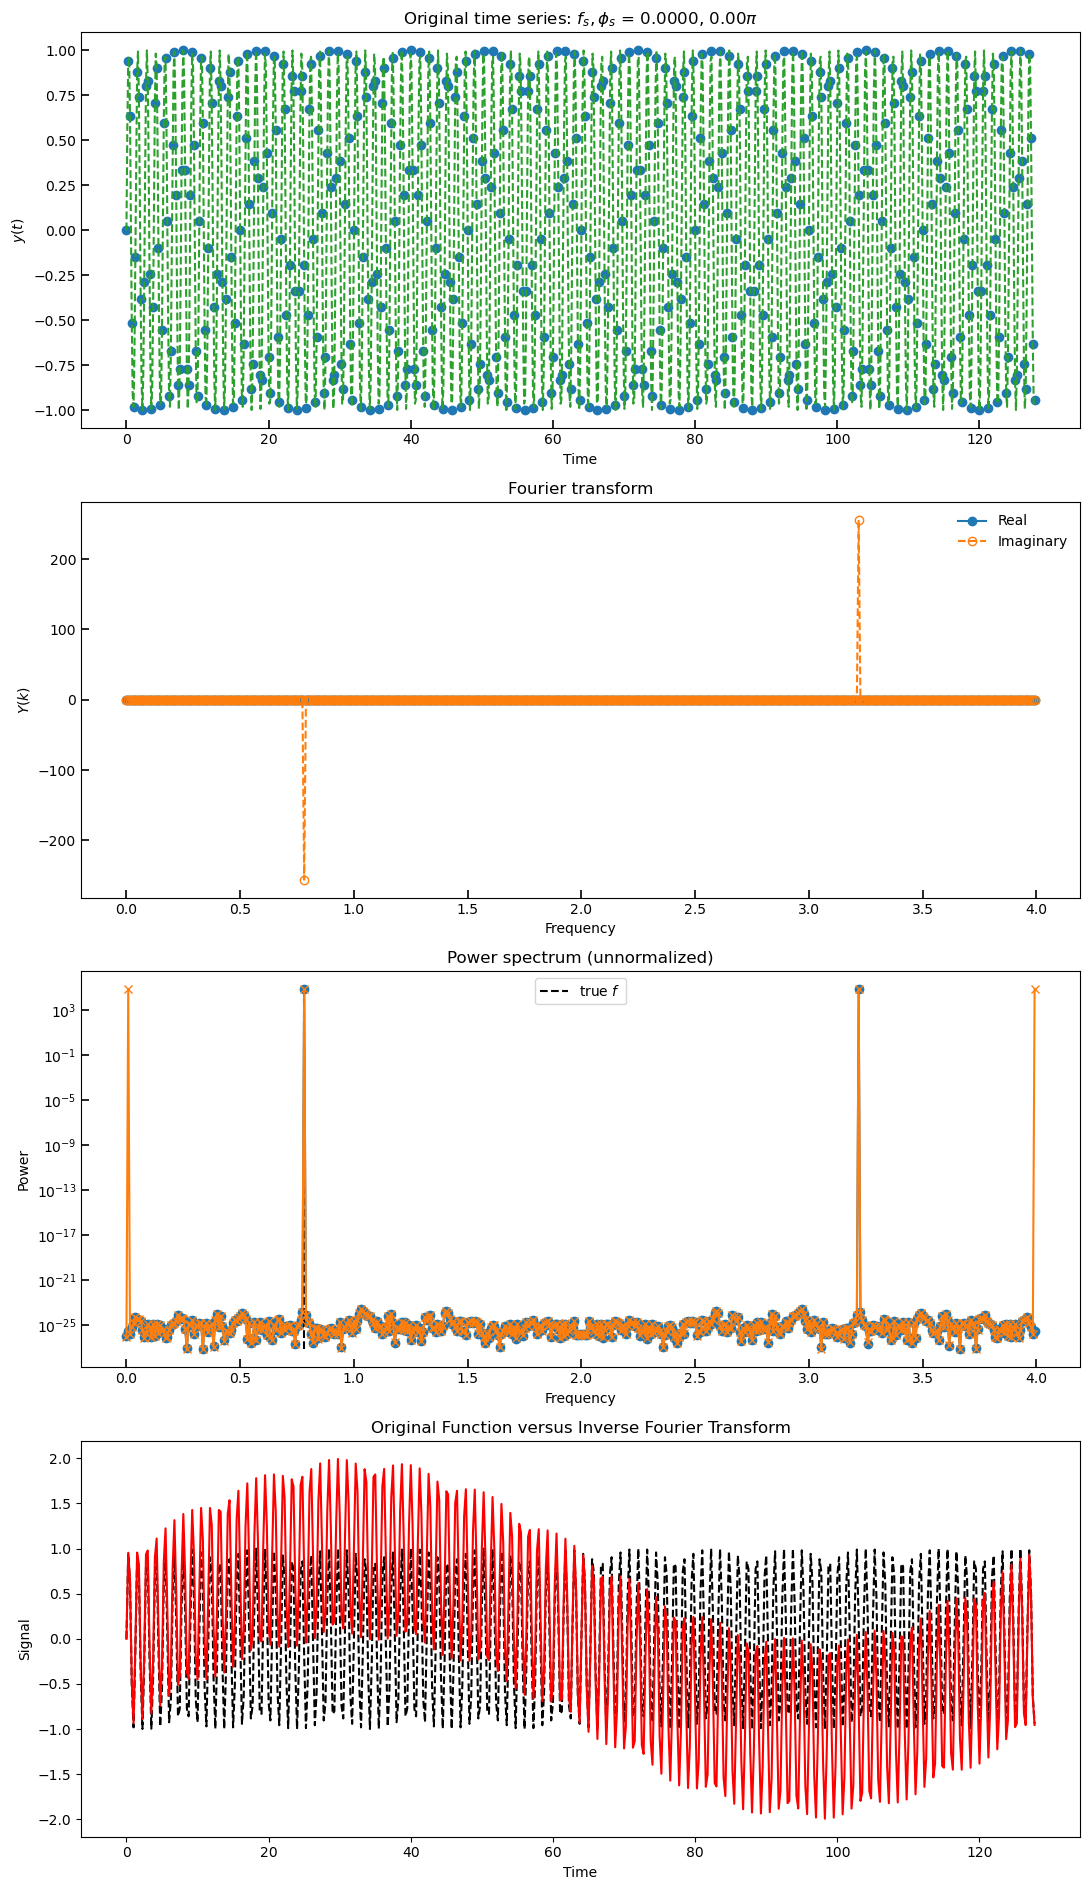

In [3]:
# ftdemo - Discrete Fourier transform demonstration program

# Set up configuration options and special features
import numpy as np
import time
import matplotlib.pyplot as plt
import datetime
import os


# Define functions to take in integer and float inputs
def dinput(input_text) :
    return int(input(input_text))


def finput(input_text) :
    return float(input(input_text))


if __name__ == '__main__':
    #* Initialize the sine wave time series to be transformed
    N = dinput('Enter the total number of data points: ')
    freq = finput('Enter the frequency of the first sine wave: ')
    phase = np.pi * finput('Enter phase of the first sine wave (in units of pi): ')
    freq2 = finput('Enter the frequency of the second sine wave: ')
    phase2 = np.pi * finput('Enter phase of the second sine wave (in units of pi): ')
    
    freq_orig = freq
    freq_orig2 = freq2
    phase_orig = phase
    phase_orig2 = phase2
    
    if freq > freq2:
        freq2 = 0
        phase2 = 0
    if freq < freq2:
        freq = 0
        phase = 0

    # Generate the data for the time series
    dt = 0.25   # Time increment
    t = np.arange(N)*dt               # t = [0, dt, 2*dt, ... ], note t = j here compared to Garcia
    y = np.sin(2*np.pi*t*freq + phase) + np.sin(2*np.pi*t*freq2 + phase2)   # Sine wave time series
    y_orig = np.sin(2*np.pi*t*freq_orig + phase_orig) + np.sin(2*np.pi*t*freq_orig2 + phase_orig2
                                                            )
    fk = np.arange(N)/(N*dt)           # f = [0, 1/(N*dt), ... ], k index


    # Lets use a finely sampled function to compare to the data, for plotting purposes:
    tmod = np.linspace(0,t[-1],1024)
    ymod = np.sin(2*np.pi*tmod*freq + phase) + np.sin(2*np.pi*tmod*freq2 + phase2)

    text_vals = r'$f_s, \phi_s$ = {0:.4f}, {1:.2f}$\pi$'.format(freq,phase/np.pi)

    #* Compute the transform using the desired method: direct summation or fast Fourier transform (FFT) algorithm.
    Y = np.zeros(N,dtype=complex)
    Method = 2

    startTime = time.time()
    if Method == 1:             # Direct summation
        twoPiN = -2 * np.pi * 1j / N    # (1j) = sqrt(-1)
        for k in range(N):
            for j in range(N):
                expTerm = np.exp(twoPiN*j*k)
                Y[k] += y[j] * expTerm
    else:                        # Fast Fourier transform:
        Y = np.fft.fft(y)               # numpy.fft.fft()
        Y_orig = np.fft.fft(y_orig)
        Y_inv = np.fft.ifft(Y)
        
    stopTime = time.time()

    print('Elapsed time = ', stopTime - startTime, ' seconds')

    # power spectrum :
    P = np.abs(Y)**2
    P_orig = np.abs(Y_orig)**2

    plt.rcParams.update({'font.size': 10})  # set bigger default font size for plots

    fig1, ax1 = plt.subplots(nrows=4, ncols=1, figsize=(11, 19))
    #* Graph the time series and its transform
    # Top subplot: time axis
    ax1[0].plot(t,y,'o', label='Input data')
    ax1[0].plot(tmod,ymod,'--',c='C2', label='Sin function')
    ax1[0].set_title('Original time series: ' + text_vals,fontsize=12)
    ax1[0].set_xlabel('Time')
    ax1[0].set_ylabel('$y(t)$')
    # ax1[0].legend(frameon=True)
    ax1[0].tick_params('both', length=6, width = 1.2, which='major', direction='in')

    # Middle subplot: fourier transform
    ax1[1].plot(fk, np.real(Y),'-o', label='Real')
    ax1[1].plot(fk, np.imag(Y),'--o',mfc='None', label='Imaginary')
    ax1[1].legend(frameon=False)
    ax1[1].set_title('Fourier transform',fontsize=12)
    ax1[1].set_xlabel('Frequency')
    ax1[1].set_ylabel('$Y(k)$')
    ax1[1].tick_params('both', length=6, width = 1.2, which='major', direction='in')

    # Bottom subplot: Power Spectrum
    ax1[2].semilogy(fk, P,'-o')
    if freq == 0:
        ax1[2].plot([freq2,freq2],[min(P),max(P)],'--',c='k',label='true $f$')
    if freq2 == 0:
        ax1[2].plot([freq,freq],[min(P),max(P)],'--',c='k',label='true $f$')
    ax1[2].semilogy(fk, P_orig, "-x")
    ax1[2].set_title('Power spectrum (unnormalized)', fontsize=12)
    ax1[2].set_xlabel('Frequency')
    ax1[2].set_ylabel('Power')
    ax1[2].legend(loc='best')
    ax1[2].tick_params('both', length=6, width = 1.2, which='major', direction='in')
    #savefig('ftdemo_fig2.png')
    
    ax1[3].plot(t,y,'--',c='k', label='Filtered Function')
    ax1[3].plot(t,y_orig,'-',c='r', label='Original Function')
    #ax1[3].plot(t,Y_inv,'x', label='Inverse Transform')
    ax1[3].set_title('Original Function versus Inverse Fourier Transform', fontsize=12)
    ax1[3].set_xlabel('Time')
    ax1[3].set_ylabel('Signal')

    

    plt.tight_layout()

    save = False # Set this flag to true if you want to save the plots.
    if save:
        today = str(datetime.date.today())
        fig_directory = os.path.expanduser('~/figs_out/' + today)
        try:
            os.makedirs(fig_directory)
        except FileExistsError:
            pass

        timeindex = time.strftime("%H%M%S")
        fig1.savefig(fig_directory + '/240-ft-examples' + '-' + str(timeindex) + '.pdf', transparent=False)

    plt.show()


Enter the total number of data points: 50
Enter the frequency of the sine wave: .2
Enter phase of the sine wave (in units of pi): 0
Elapsed time =  0.0  seconds


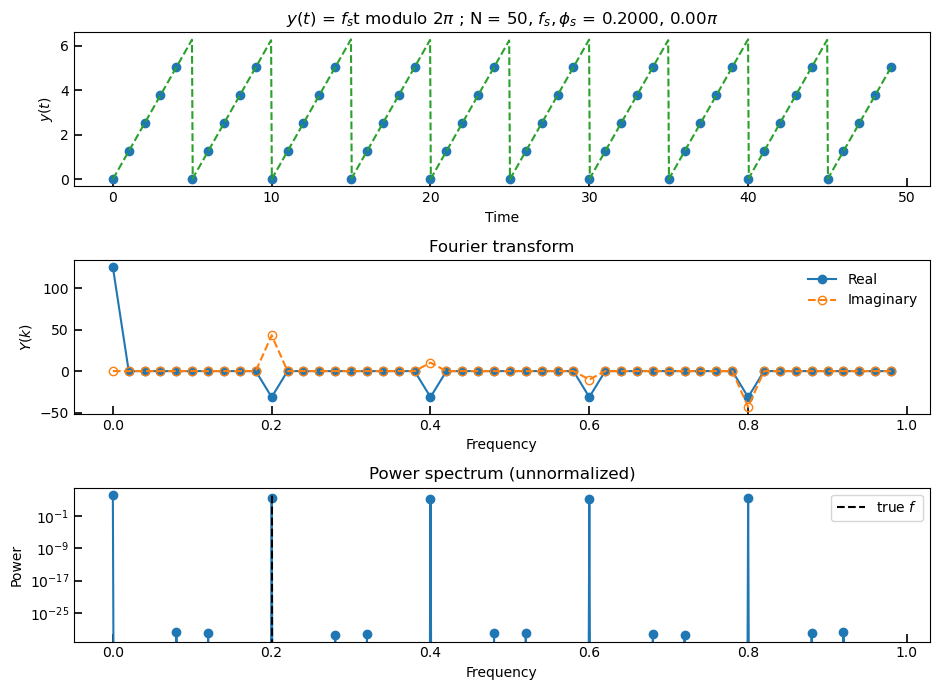

In [4]:
#CHALLENGE QUESTION

if __name__ == '__main__':
    #* Initialize the sine wave time series to be transformed
    N = dinput('Enter the total number of data points: ')
    freq = finput('Enter the frequency of the sine wave: ')
    phase = np.pi * finput('Enter phase of the sine wave (in units of pi): ')

    # Generate the data for the time series
    dt = 1   # Time increment
    t = np.arange(N)*dt               # t = [0, dt, 2*dt, ... ], note t = j here compared to Garcia
    y = 2*np.pi*freq*t%(2*np.pi)   # Sine wave time series
    fk = np.arange(N)/(N*dt)           # f = [0, 1/(N*dt), ... ], k index


    # Lets use a finely sampled function to compare to the data, for plotting purposes:
    tmod = np.linspace(0,t[-1],1024)
    ymod = 2*np.pi*freq*tmod%(2*np.pi)

    text_vals = r'$f_s, \phi_s$ = {0:.4f}, {1:.2f}$\pi$'.format(freq,phase/np.pi)

    #* Compute the transform using the desired method: direct summation or fast Fourier transform (FFT) algorithm.
    Y = np.zeros(N,dtype=complex)
    Method = 2

    startTime = time.time()
    if Method == 1:             # Direct summation
        twoPiN = -2 * np.pi * 1j / N    # (1j) = sqrt(-1)
        for k in range(N):
            for j in range(N):
                expTerm = np.exp(twoPiN*j*k)
                Y[k] += y[j] * expTerm
    else:                        # Fast Fourier transform:
        Y = np.fft.fft(y)               # numpy.fft.fft()

    stopTime = time.time()

    print('Elapsed time = ', stopTime - startTime, ' seconds')

    # power spectrum :
    P = np.abs(Y)**2

    plt.rcParams.update({'font.size': 10})  # set bigger default font size for plots

    fig1, ax1 = plt.subplots(nrows=3, ncols=1, figsize=(9.5, 7))
    #* Graph the time series and its transform
    # Top subplot: time axis
    ax1[0].plot(t,y,'o', label='Input data')
    ax1[0].plot(tmod,ymod,'--',c='C2', label='Sin function')
    ax1[0].set_title('$y(t)$ = $f_s$t modulo 2$\pi$ ; N = 50, ' + text_vals,fontsize=12)
    ax1[0].set_xlabel('Time')
    ax1[0].set_ylabel('$y(t)$')
    # ax1[0].legend(frameon=True)
    ax1[0].tick_params('both', length=6, width = 1.2, which='major', direction='in')

    # Middle subplot: fourier transform
    ax1[1].plot(fk, np.real(Y),'-o', label='Real')
    ax1[1].plot(fk, np.imag(Y),'--o',mfc='None', label='Imaginary')
    ax1[1].legend(frameon=False)
    ax1[1].set_title('Fourier transform',fontsize=12)
    ax1[1].set_xlabel('Frequency')
    ax1[1].set_ylabel('$Y(k)$')
    ax1[1].tick_params('both', length=6, width = 1.2, which='major', direction='in')

    # Bottom subplot: Power Spectrum
    ax1[2].semilogy(fk, P,'-o')
    ax1[2].plot([freq,freq],[min(P),max(P)],'--',c='k',label='true $f$')
    ax1[2].set_title('Power spectrum (unnormalized)', fontsize=12)
    ax1[2].set_xlabel('Frequency')
    ax1[2].set_ylabel('Power')
    ax1[2].legend(loc='best')
    ax1[2].tick_params('both', length=6, width = 1.2, which='major', direction='in')

    
    plt.tight_layout()

    save = False # Set this flag to true if you want to save the plots.
    if save:
        today = str(datetime.date.today())
        fig_directory = os.path.expanduser('~/figs_out/' + today)
        try:
            os.makedirs(fig_directory)
        except FileExistsError:
            pass

        timeindex = time.strftime("%H%M%S")
        fig1.savefig(fig_directory + '/240-ft-examples' + '-' + str(timeindex) + '.pdf', transparent=False)

    plt.show()


Enter the total number of data points: 512
Enter the frequency of the sine wave: .2
Enter phase of the sine wave (in units of pi): 0
Elapsed time =  0.0  seconds


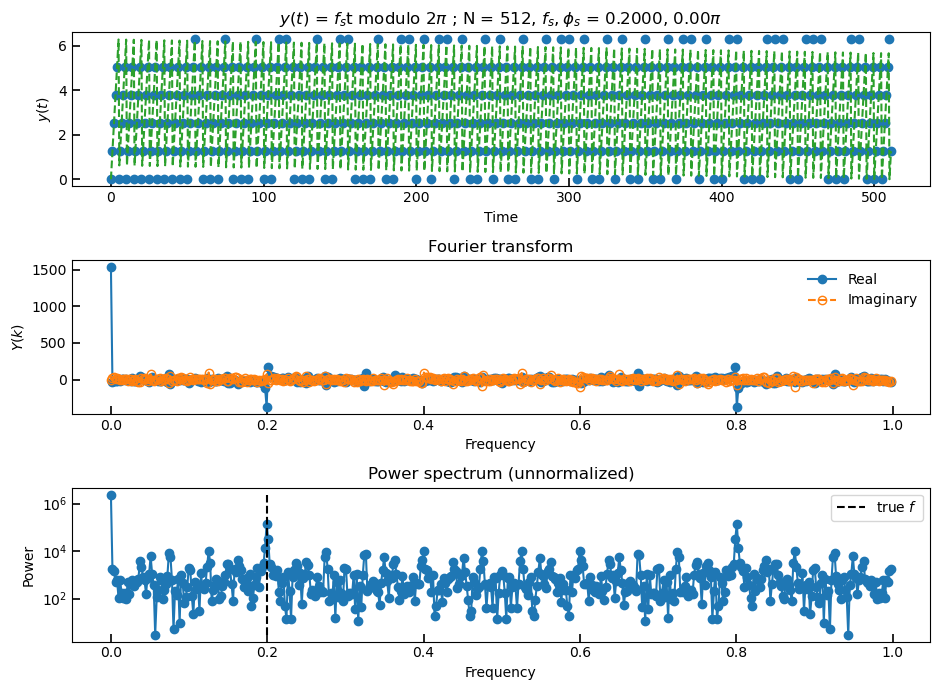

In [5]:
if __name__ == '__main__':
    #* Initialize the sine wave time series to be transformed
    N = dinput('Enter the total number of data points: ')
    freq = finput('Enter the frequency of the sine wave: ')
    phase = np.pi * finput('Enter phase of the sine wave (in units of pi): ')

    # Generate the data for the time series
    dt = 1   # Time increment
    t = np.arange(N)*dt               # t = [0, dt, 2*dt, ... ], note t = j here compared to Garcia
    y = 2*np.pi*freq*t%(2*np.pi)   # Sine wave time series
    fk = np.arange(N)/(N*dt)           # f = [0, 1/(N*dt), ... ], k index


    # Lets use a finely sampled function to compare to the data, for plotting purposes:
    tmod = np.linspace(0,t[-1],1024)
    ymod = 2*np.pi*freq*tmod%(2*np.pi)

    text_vals = r'$f_s, \phi_s$ = {0:.4f}, {1:.2f}$\pi$'.format(freq,phase/np.pi)

    #* Compute the transform using the desired method: direct summation or fast Fourier transform (FFT) algorithm.
    Y = np.zeros(N,dtype=complex)
    Method = 2

    startTime = time.time()
    if Method == 1:             # Direct summation
        twoPiN = -2 * np.pi * 1j / N    # (1j) = sqrt(-1)
        for k in range(N):
            for j in range(N):
                expTerm = np.exp(twoPiN*j*k)
                Y[k] += y[j] * expTerm
    else:                        # Fast Fourier transform:
        Y = np.fft.fft(y)               # numpy.fft.fft()

    stopTime = time.time()

    print('Elapsed time = ', stopTime - startTime, ' seconds')

    # power spectrum :
    P = np.abs(Y)**2

    plt.rcParams.update({'font.size': 10})  # set bigger default font size for plots

    fig1, ax1 = plt.subplots(nrows=3, ncols=1, figsize=(9.5, 7))
    #* Graph the time series and its transform
    # Top subplot: time axis
    ax1[0].plot(t,y,'o', label='Input data')
    ax1[0].plot(tmod,ymod,'--',c='C2', label='Sin function')
    ax1[0].set_title('$y(t)$ = $f_s$t modulo 2$\pi$ ; N = 512, ' + text_vals,fontsize=12)
    ax1[0].set_xlabel('Time')
    ax1[0].set_ylabel('$y(t)$')
    # ax1[0].legend(frameon=True)
    ax1[0].tick_params('both', length=6, width = 1.2, which='major', direction='in')

    # Middle subplot: fourier transform
    ax1[1].plot(fk, np.real(Y),'-o', label='Real')
    ax1[1].plot(fk, np.imag(Y),'--o',mfc='None', label='Imaginary')
    ax1[1].legend(frameon=False)
    ax1[1].set_title('Fourier transform',fontsize=12)
    ax1[1].set_xlabel('Frequency')
    ax1[1].set_ylabel('$Y(k)$')
    ax1[1].tick_params('both', length=6, width = 1.2, which='major', direction='in')
    
    # Bottom subplot: Power Spectrum
    ax1[2].semilogy(fk, P,'-o')
    ax1[2].plot([freq,freq],[min(P),max(P)],'--',c='k',label='true $f$')
    ax1[2].set_title('Power spectrum (unnormalized)', fontsize=12)
    ax1[2].set_xlabel('Frequency')
    ax1[2].set_ylabel('Power')
    ax1[2].legend(loc='best')
    ax1[2].tick_params('both', length=6, width = 1.2, which='major', direction='in')

    plt.tight_layout()

    save = False # Set this flag to true if you want to save the plots.
    if save:
        today = str(datetime.date.today())
        fig_directory = os.path.expanduser('~/figs_out/' + today)
        try:
            os.makedirs(fig_directory)
        except FileExistsError:
            pass

        timeindex = time.strftime("%H%M%S")
        fig1.savefig(fig_directory + '/240-ft-examples' + '-' + str(timeindex) + '.pdf', transparent=False)

    plt.show()


Enter the total number of data points: 50
Enter the frequency of the sine wave: .2123
Enter phase of the sine wave (in units of pi): 0
Elapsed time =  0.0  seconds


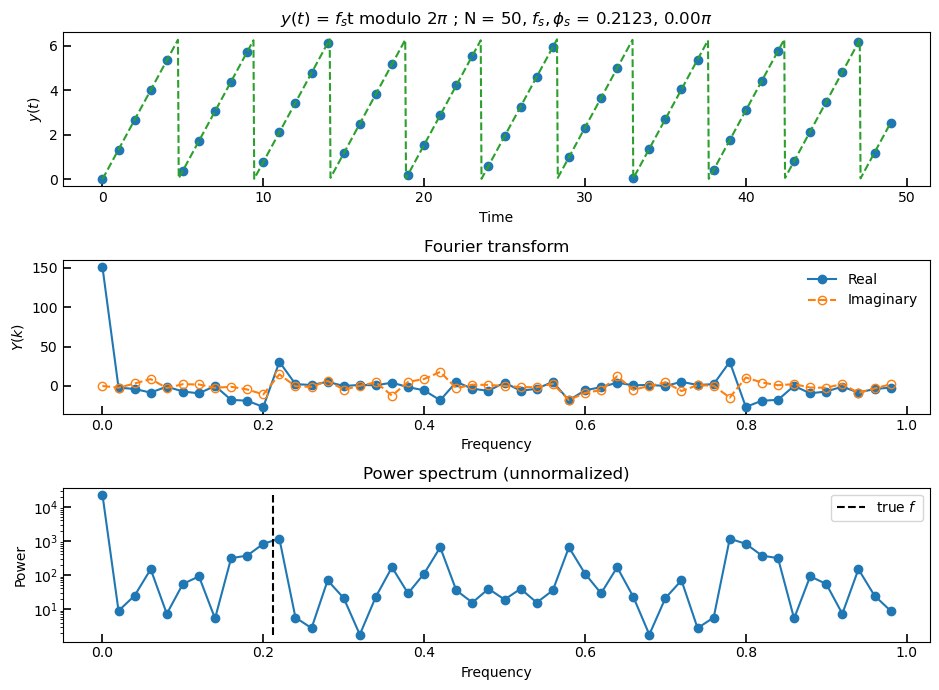

In [6]:
if __name__ == '__main__':
    #* Initialize the sine wave time series to be transformed
    N = dinput('Enter the total number of data points: ')
    freq = finput('Enter the frequency of the sine wave: ')
    phase = np.pi * finput('Enter phase of the sine wave (in units of pi): ')

    # Generate the data for the time series
    dt = 1   # Time increment
    t = np.arange(N)*dt               # t = [0, dt, 2*dt, ... ], note t = j here compared to Garcia
    y = 2*np.pi*freq*t%(2*np.pi)   # Sine wave time series
    fk = np.arange(N)/(N*dt)           # f = [0, 1/(N*dt), ... ], k index


    # Lets use a finely sampled function to compare to the data, for plotting purposes:
    tmod = np.linspace(0,t[-1],1024)
    ymod = 2*np.pi*freq*tmod%(2*np.pi)

    text_vals = r'$f_s, \phi_s$ = {0:.4f}, {1:.2f}$\pi$'.format(freq,phase/np.pi)

    #* Compute the transform using the desired method: direct summation or fast Fourier transform (FFT) algorithm.
    Y = np.zeros(N,dtype=complex)
    Method = 2

    startTime = time.time()
    if Method == 1:             # Direct summation
        twoPiN = -2 * np.pi * 1j / N    # (1j) = sqrt(-1)
        for k in range(N):
            for j in range(N):
                expTerm = np.exp(twoPiN*j*k)
                Y[k] += y[j] * expTerm
    else:                        # Fast Fourier transform:
        Y = np.fft.fft(y)               # numpy.fft.fft()

    stopTime = time.time()

    print('Elapsed time = ', stopTime - startTime, ' seconds')

    # power spectrum :
    P = np.abs(Y)**2

    plt.rcParams.update({'font.size': 10})  # set bigger default font size for plots

    fig1, ax1 = plt.subplots(nrows=3, ncols=1, figsize=(9.5, 7))
    #* Graph the time series and its transform
    # Top subplot: time axis
    ax1[0].plot(t,y,'o', label='Input data')
    ax1[0].plot(tmod,ymod,'--',c='C2', label='Sin function')
    ax1[0].set_title('$y(t)$ = $f_s$t modulo 2$\pi$ ; N = 50, ' + text_vals,fontsize=12)
    ax1[0].set_xlabel('Time')
    ax1[0].set_ylabel('$y(t)$')
    # ax1[0].legend(frameon=True)
    ax1[0].tick_params('both', length=6, width = 1.2, which='major', direction='in')

    # Middle subplot: fourier transform
    ax1[1].plot(fk, np.real(Y),'-o', label='Real')
    ax1[1].plot(fk, np.imag(Y),'--o',mfc='None', label='Imaginary')
    ax1[1].legend(frameon=False)
    ax1[1].set_title('Fourier transform',fontsize=12)
    ax1[1].set_xlabel('Frequency')
    ax1[1].set_ylabel('$Y(k)$')
    ax1[1].tick_params('both', length=6, width = 1.2, which='major', direction='in')
    
     # Bottom subplot: Power Spectrum
    ax1[2].semilogy(fk, P,'-o')
    ax1[2].plot([freq,freq],[min(P),max(P)],'--',c='k',label='true $f$')
    ax1[2].set_title('Power spectrum (unnormalized)', fontsize=12)
    ax1[2].set_xlabel('Frequency')
    ax1[2].set_ylabel('Power')
    ax1[2].legend(loc='best')
    ax1[2].tick_params('both', length=6, width = 1.2, which='major', direction='in')

    plt.tight_layout()

    save = False # Set this flag to true if you want to save the plots.
    if save:
        today = str(datetime.date.today())
        fig_directory = os.path.expanduser('~/figs_out/' + today)
        try:
            os.makedirs(fig_directory)
        except FileExistsError:
            pass

        timeindex = time.strftime("%H%M%S")
        fig1.savefig(fig_directory + '/240-ft-examples' + '-' + str(timeindex) + '.pdf', transparent=False)

    plt.show()


Enter the total number of data points: 512
Enter the frequency of the sine wave: .2123
Enter phase of the sine wave (in units of pi): 0
Elapsed time =  0.0  seconds


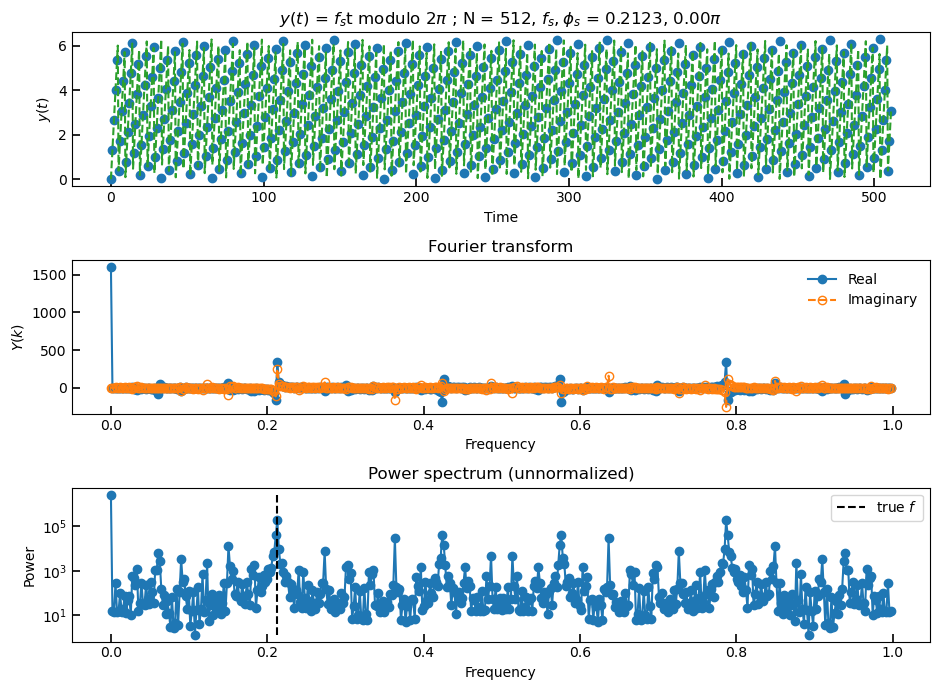

In [7]:
if __name__ == '__main__':
    #* Initialize the sine wave time series to be transformed
    N = dinput('Enter the total number of data points: ')
    freq = finput('Enter the frequency of the sine wave: ')
    phase = np.pi * finput('Enter phase of the sine wave (in units of pi): ')

    # Generate the data for the time series
    dt = 1   # Time increment
    t = np.arange(N)*dt               # t = [0, dt, 2*dt, ... ], note t = j here compared to Garcia
    y = 2*np.pi*freq*t%(2*np.pi)   # Sine wave time series
    fk = np.arange(N)/(N*dt)           # f = [0, 1/(N*dt), ... ], k index


    # Lets use a finely sampled function to compare to the data, for plotting purposes:
    tmod = np.linspace(0,t[-1],1024)
    ymod = 2*np.pi*freq*tmod%(2*np.pi)

    text_vals = r'$f_s, \phi_s$ = {0:.4f}, {1:.2f}$\pi$'.format(freq,phase/np.pi)

    #* Compute the transform using the desired method: direct summation or fast Fourier transform (FFT) algorithm.
    Y = np.zeros(N,dtype=complex)
    Method = 2

    startTime = time.time()
    if Method == 1:             # Direct summation
        twoPiN = -2 * np.pi * 1j / N    # (1j) = sqrt(-1)
        for k in range(N):
            for j in range(N):
                expTerm = np.exp(twoPiN*j*k)
                Y[k] += y[j] * expTerm
    else:                        # Fast Fourier transform:
        Y = np.fft.fft(y)               # numpy.fft.fft()

    stopTime = time.time()

    print('Elapsed time = ', stopTime - startTime, ' seconds')

    # power spectrum :
    P = np.abs(Y)**2

    plt.rcParams.update({'font.size': 10})  # set bigger default font size for plots

    fig1, ax1 = plt.subplots(nrows=3, ncols=1, figsize=(9.5, 7))
    #* Graph the time series and its transform
    # Top subplot: time axis
    ax1[0].plot(t,y,'o', label='Input data')
    ax1[0].plot(tmod,ymod,'--',c='C2', label='Sin function')
    ax1[0].set_title('$y(t)$ = $f_s$t modulo 2$\pi$ ; N = 512, ' + text_vals,fontsize=12)
    ax1[0].set_xlabel('Time')
    ax1[0].set_ylabel('$y(t)$')
    # ax1[0].legend(frameon=True)
    ax1[0].tick_params('both', length=6, width = 1.2, which='major', direction='in')

    # Middle subplot: fourier transform
    ax1[1].plot(fk, np.real(Y),'-o', label='Real')
    ax1[1].plot(fk, np.imag(Y),'--o',mfc='None', label='Imaginary')
    ax1[1].legend(frameon=False)
    ax1[1].set_title('Fourier transform',fontsize=12)
    ax1[1].set_xlabel('Frequency')
    ax1[1].set_ylabel('$Y(k)$')
    ax1[1].tick_params('both', length=6, width = 1.2, which='major', direction='in')
    
     # Bottom subplot: Power Spectrum
    ax1[2].semilogy(fk, P,'-o')
    ax1[2].plot([freq,freq],[min(P),max(P)],'--',c='k',label='true $f$')
    ax1[2].set_title('Power spectrum (unnormalized)', fontsize=12)
    ax1[2].set_xlabel('Frequency')
    ax1[2].set_ylabel('Power')
    ax1[2].legend(loc='best')
    ax1[2].tick_params('both', length=6, width = 1.2, which='major', direction='in')

    plt.tight_layout()

    save = False # Set this flag to true if you want to save the plots.
    if save:
        today = str(datetime.date.today())
        fig_directory = os.path.expanduser('~/figs_out/' + today)
        try:
            os.makedirs(fig_directory)
        except FileExistsError:
            pass

        timeindex = time.strftime("%H%M%S")
        fig1.savefig(fig_directory + '/240-ft-examples' + '-' + str(timeindex) + '.pdf', transparent=False)

    plt.show()


Enter the total number of data points: 50
Enter the frequency of the sine wave: .8
Enter phase of the sine wave (in units of pi): 0
Elapsed time =  0.0009942054748535156  seconds


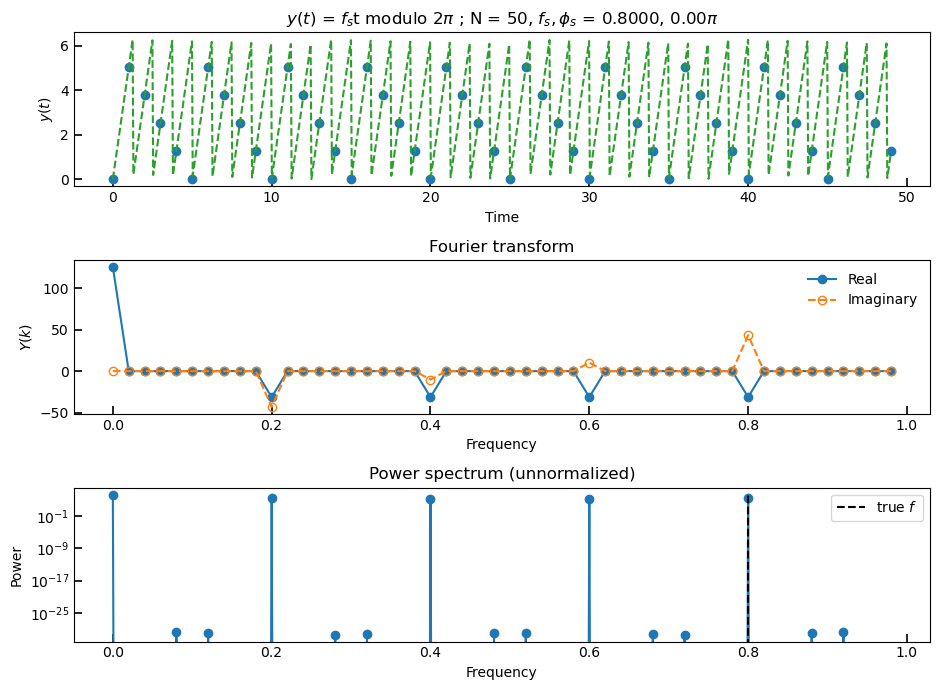

In [8]:
if __name__ == '__main__':
    #* Initialize the sine wave time series to be transformed
    N = dinput('Enter the total number of data points: ')
    freq = finput('Enter the frequency of the sine wave: ')
    phase = np.pi * finput('Enter phase of the sine wave (in units of pi): ')

    # Generate the data for the time series
    dt = 1   # Time increment
    t = np.arange(N)*dt               # t = [0, dt, 2*dt, ... ], note t = j here compared to Garcia
    y = 2*np.pi*freq*t%(2*np.pi)   # Sine wave time series
    fk = np.arange(N)/(N*dt)           # f = [0, 1/(N*dt), ... ], k index


    # Lets use a finely sampled function to compare to the data, for plotting purposes:
    tmod = np.linspace(0,t[-1],1024)
    ymod = 2*np.pi*freq*tmod%(2*np.pi)

    text_vals = r'$f_s, \phi_s$ = {0:.4f}, {1:.2f}$\pi$'.format(freq,phase/np.pi)

    #* Compute the transform using the desired method: direct summation or fast Fourier transform (FFT) algorithm.
    Y = np.zeros(N,dtype=complex)
    Method = 2

    startTime = time.time()
    if Method == 1:             # Direct summation
        twoPiN = -2 * np.pi * 1j / N    # (1j) = sqrt(-1)
        for k in range(N):
            for j in range(N):
                expTerm = np.exp(twoPiN*j*k)
                Y[k] += y[j] * expTerm
    else:                        # Fast Fourier transform:
        Y = np.fft.fft(y)               # numpy.fft.fft()

    stopTime = time.time()

    print('Elapsed time = ', stopTime - startTime, ' seconds')

    # power spectrum :
    P = np.abs(Y)**2

    plt.rcParams.update({'font.size': 10})  # set bigger default font size for plots

    fig1, ax1 = plt.subplots(nrows=3, ncols=1, figsize=(9.5, 7))
    #* Graph the time series and its transform
    # Top subplot: time axis
    ax1[0].plot(t,y,'o', label='Input data')
    ax1[0].plot(tmod,ymod,'--',c='C2', label='Sin function')
    ax1[0].set_title('$y(t)$ = $f_s$t modulo 2$\pi$ ; N = 50, ' + text_vals,fontsize=12)
    ax1[0].set_xlabel('Time')
    ax1[0].set_ylabel('$y(t)$')
    # ax1[0].legend(frameon=True)
    ax1[0].tick_params('both', length=6, width = 1.2, which='major', direction='in')

    # Middle subplot: fourier transform
    ax1[1].plot(fk, np.real(Y),'-o', label='Real')
    ax1[1].plot(fk, np.imag(Y),'--o',mfc='None', label='Imaginary')
    ax1[1].legend(frameon=False)
    ax1[1].set_title('Fourier transform',fontsize=12)
    ax1[1].set_xlabel('Frequency')
    ax1[1].set_ylabel('$Y(k)$')
    ax1[1].tick_params('both', length=6, width = 1.2, which='major', direction='in')
    
    # Bottom subplot: Power Spectrum
    ax1[2].semilogy(fk, P,'-o')
    ax1[2].plot([freq,freq],[min(P),max(P)],'--',c='k',label='true $f$')
    ax1[2].set_title('Power spectrum (unnormalized)', fontsize=12)
    ax1[2].set_xlabel('Frequency')
    ax1[2].set_ylabel('Power')
    ax1[2].legend(loc='best')
    ax1[2].tick_params('both', length=6, width = 1.2, which='major', direction='in')


    plt.tight_layout()

    save = False # Set this flag to true if you want to save the plots.
    if save:
        today = str(datetime.date.today())
        fig_directory = os.path.expanduser('~/figs_out/' + today)
        try:
            os.makedirs(fig_directory)
        except FileExistsError:
            pass

        timeindex = time.strftime("%H%M%S")
        fig1.savefig(fig_directory + '/240-ft-examples' + '-' + str(timeindex) + '.pdf', transparent=False)

    plt.show()


Enter the total number of data points: 512
Enter the frequency of the sine wave: .8
Enter phase of the sine wave (in units of pi): 0
Elapsed time =  0.0  seconds


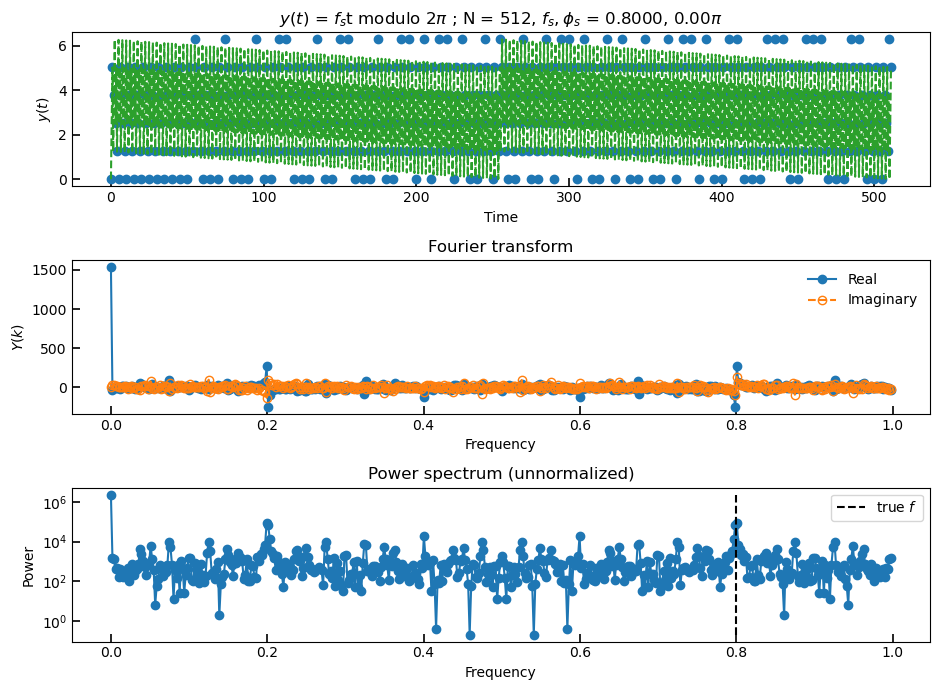

In [9]:
if __name__ == '__main__':
    #* Initialize the sine wave time series to be transformed
    N = dinput('Enter the total number of data points: ')
    freq = finput('Enter the frequency of the sine wave: ')
    phase = np.pi * finput('Enter phase of the sine wave (in units of pi): ')

    # Generate the data for the time series
    dt = 1   # Time increment
    t = np.arange(N)*dt               # t = [0, dt, 2*dt, ... ], note t = j here compared to Garcia
    y = 2*np.pi*freq*t%(2*np.pi)   # Sine wave time series
    fk = np.arange(N)/(N*dt)           # f = [0, 1/(N*dt), ... ], k index


    # Lets use a finely sampled function to compare to the data, for plotting purposes:
    tmod = np.linspace(0,t[-1],1024)
    ymod = 2*np.pi*freq*tmod%(2*np.pi)

    text_vals = r'$f_s, \phi_s$ = {0:.4f}, {1:.2f}$\pi$'.format(freq,phase/np.pi)

    #* Compute the transform using the desired method: direct summation or fast Fourier transform (FFT) algorithm.
    Y = np.zeros(N,dtype=complex)
    Method = 2

    startTime = time.time()
    if Method == 1:             # Direct summation
        twoPiN = -2 * np.pi * 1j / N    # (1j) = sqrt(-1)
        for k in range(N):
            for j in range(N):
                expTerm = np.exp(twoPiN*j*k)
                Y[k] += y[j] * expTerm
    else:                        # Fast Fourier transform:
        Y = np.fft.fft(y)               # numpy.fft.fft()

    stopTime = time.time()

    print('Elapsed time = ', stopTime - startTime, ' seconds')

    # power spectrum :
    P = np.abs(Y)**2

    plt.rcParams.update({'font.size': 10})  # set bigger default font size for plots

    fig1, ax1 = plt.subplots(nrows=3, ncols=1, figsize=(9.5, 7))
    #* Graph the time series and its transform
    # Top subplot: time axis
    ax1[0].plot(t,y,'o', label='Input data')
    ax1[0].plot(tmod,ymod,'--',c='C2', label='Sin function')
    ax1[0].set_title('$y(t)$ = $f_s$t modulo 2$\pi$ ; N = 512, ' + text_vals,fontsize=12)
    ax1[0].set_xlabel('Time')
    ax1[0].set_ylabel('$y(t)$')
    # ax1[0].legend(frameon=True)
    ax1[0].tick_params('both', length=6, width = 1.2, which='major', direction='in')

    # Middle subplot: fourier transform
    ax1[1].plot(fk, np.real(Y),'-o', label='Real')
    ax1[1].plot(fk, np.imag(Y),'--o',mfc='None', label='Imaginary')
    ax1[1].legend(frameon=False)
    ax1[1].set_title('Fourier transform',fontsize=12)
    ax1[1].set_xlabel('Frequency')
    ax1[1].set_ylabel('$Y(k)$')
    ax1[1].tick_params('both', length=6, width = 1.2, which='major', direction='in')

    # Bottom subplot: Power Spectrum
    ax1[2].semilogy(fk, P,'-o')
    ax1[2].plot([freq,freq],[min(P),max(P)],'--',c='k',label='true $f$')
    ax1[2].set_title('Power spectrum (unnormalized)', fontsize=12)
    ax1[2].set_xlabel('Frequency')
    ax1[2].set_ylabel('Power')
    ax1[2].legend(loc='best')
    ax1[2].tick_params('both', length=6, width = 1.2, which='major', direction='in')
    
    plt.tight_layout()

    save = False # Set this flag to true if you want to save the plots.
    if save:
        today = str(datetime.date.today())
        fig_directory = os.path.expanduser('~/figs_out/' + today)
        try:
            os.makedirs(fig_directory)
        except FileExistsError:
            pass

        timeindex = time.strftime("%H%M%S")
        fig1.savefig(fig_directory + '/240-ft-examples' + '-' + str(timeindex) + '.pdf', transparent=False)

    plt.show()
